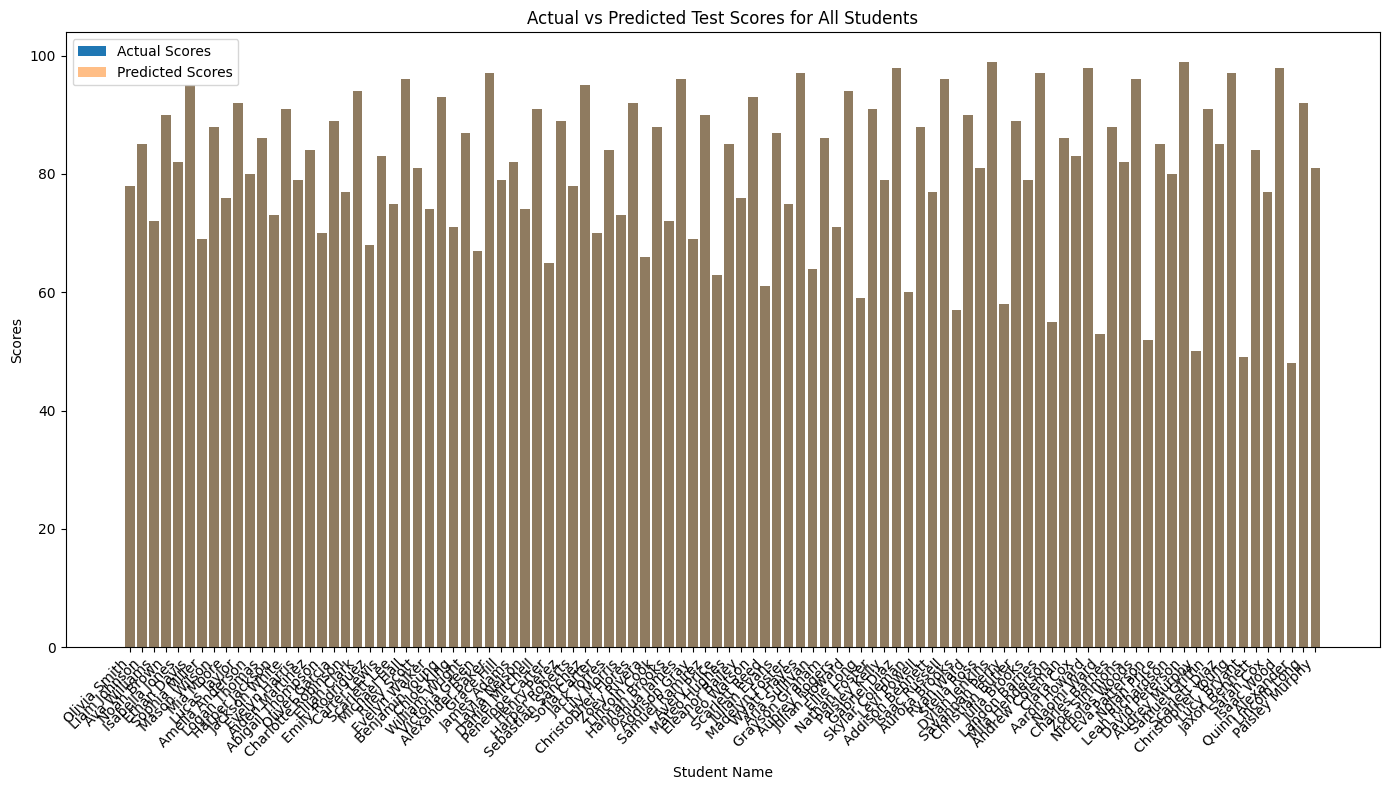

In [ ]:



# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Predict scores for all students
y_pred = lin_model.predict(X)

# Plot bar chart
plt.figure(figsize=(14, 8))
student_names = df['Name']
plt.bar(student_names, y, label='Actual Scores')
plt.bar(student_names, y_pred, alpha=0.5, label='Predicted Scores')
plt.xlabel('Student Name')
plt.ylabel('Scores')
plt.title('Actual vs Predicted Test Scores for All Students')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Predict scores for all students
y_pred = lin_model.predict(X)

# Plot bar chart function
def plot_bar_chart(student_id):
    student_data = df[df['id'] == student_id]
    if not student_data.empty:
        # Preprocess student data
        X_student = preprocessor.transform(student_data.drop(columns=['Weekend_Test_score'], axis=1))
        # Predict test score for the student
        y_pred_student = lin_model.predict(X_student)
        # Plot bar chart
        plt.figure(figsize=(8, 6))
        plt.bar('Actual', student_data['Test_score'].iloc[0], label='Actual Score')
        plt.bar('Predicted', y_pred_student[0], label='Predicted Score')
        plt.xlabel('Score Type')
        plt.ylabel('Score')
        plt.title(f'Actual vs Predicted Test Score for Student ID {student_id}')
        plt.legend()
        plt.show()
    else:
        print(f"Student with ID {student_id} not found.")

# Button click event function
def on_button_click(b):
    student_id = int(text.value)
    plot_bar_chart(student_id)

# Create a text box for entering student ID
text = widgets.Text(
    value='',
    placeholder='Enter Student ID',
    description='Student ID:',
    disabled=False
)

# Create a button
button = widgets.Button(
    description='Predict Score',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to predict score',
    icon='check'
)

# Display the text box and button
display(text)
display(button)

# Attach the button click event
button.on_click(on_button_click)

FileNotFoundError: [Errno 2] No such file or directory: '/content/StudentsPerformanceTS.csv'

In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Predict scores for all students
y_pred = lin_model.predict(X)

# Plot bar chart function
def plot_bar_chart(student_name):
    student_data = df[df['Name'] == student_name]
    if not student_data.empty:
        # Preprocess student data
        X_student = preprocessor.transform(student_data.drop(columns=['Weekend_Test_score'], axis=1))
        # Predict test score for the student
        y_pred_student = lin_model.predict(X_student)
        # Plot bar chart
        plt.figure(figsize=(8, 6))
        plt.bar(student_name, student_data['Test_score'].iloc[0], label='Actual Score')
        plt.bar(student_name, y_pred_student[0], label='Predicted Score')
        plt.xlabel('Student Name')
        plt.ylabel('Score')
        plt.title(f'Actual vs Predicted Test Score for Student: {student_name}')
        plt.legend()
        plt.show()
    else:
        print(f"Student with Name {student_name} not found.")

# Button click event function
def on_button_click(b):
    student_name = text.value
    plot_bar_chart(student_name)

# Create a text box for entering student name
text = widgets.Text(
    value='',
    placeholder='Enter Student Name',
    description='Student Name:',
    disabled=False
)

# Create a button
button = widgets.Button(
    description='Predict Score',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to predict score',
    icon='check'
)

# Display the text box and button
display(text)
display(button)

# Attach the button click event
button.on_click(on_button_click)


Text(value='', description='Student Name:', placeholder='Enter Student Name')

Button(description='Predict Score', icon='check', style=ButtonStyle(), tooltip='Click to predict score')

Enter the starting ID: 2
Enter the ending ID: 6


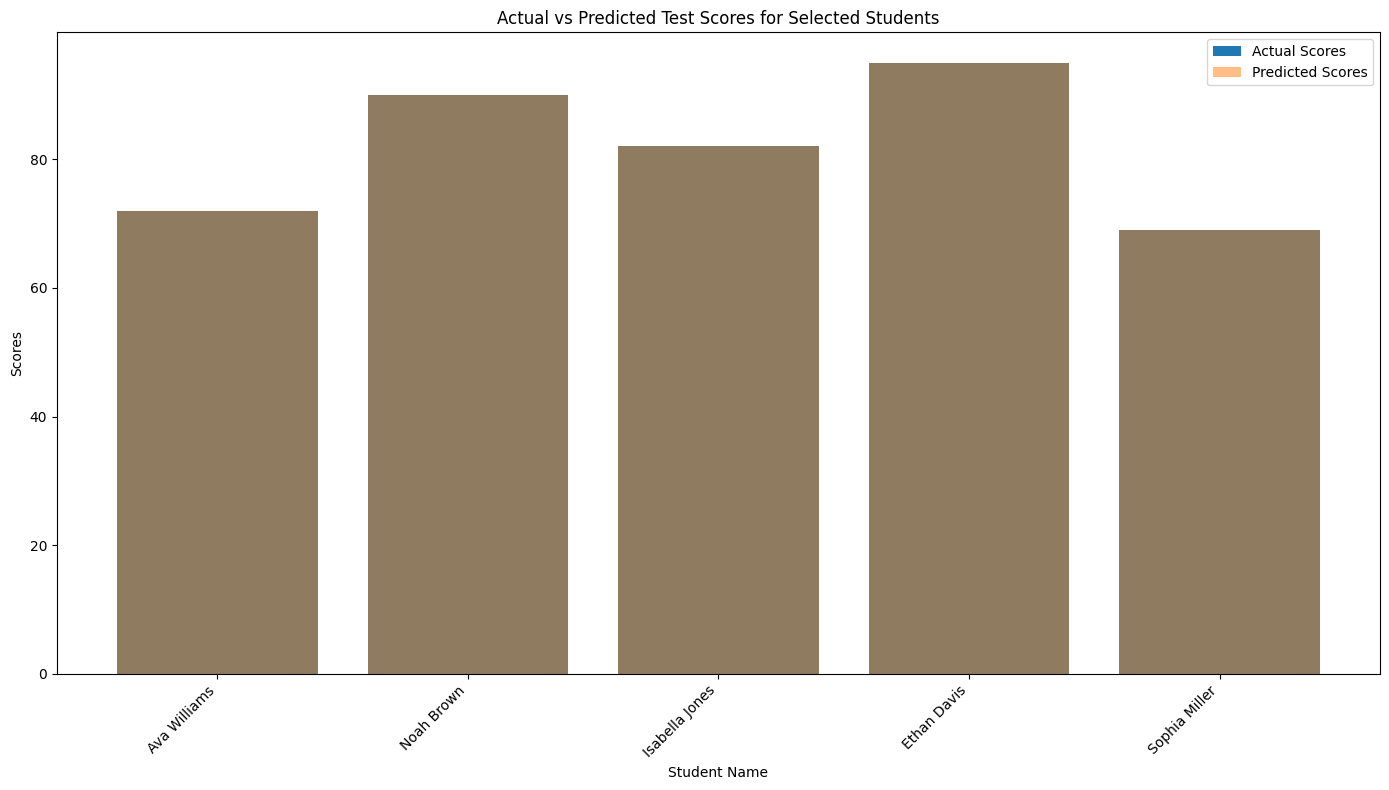

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

def predict_scores(start_id, end_id):
    # Filter dataframe based on starting and ending ID
    selected_students = df[(df.index >= start_id) & (df.index <= end_id)]

    # Preprocess the selected data
    X_selected = selected_students.drop(columns=['Weekend_Test_score'], axis=1)
    y_selected = selected_students['Test_score']
    X_selected = preprocessor.transform(X_selected)

    # Predict scores for selected students
    y_pred_selected = lin_model.predict(X_selected)

    # Plot bar chart for selected students
    plt.figure(figsize=(14, 8))
    student_names_selected = selected_students['Name']
    plt.bar(student_names_selected, y_selected, label='Actual Scores')
    plt.bar(student_names_selected, y_pred_selected, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for Selected Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

# Get starting and ending ID from the user
start_id = int(input("Enter the starting ID: "))
end_id = int(input("Enter the ending ID: "))

predict_scores(start_id, end_id)



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit


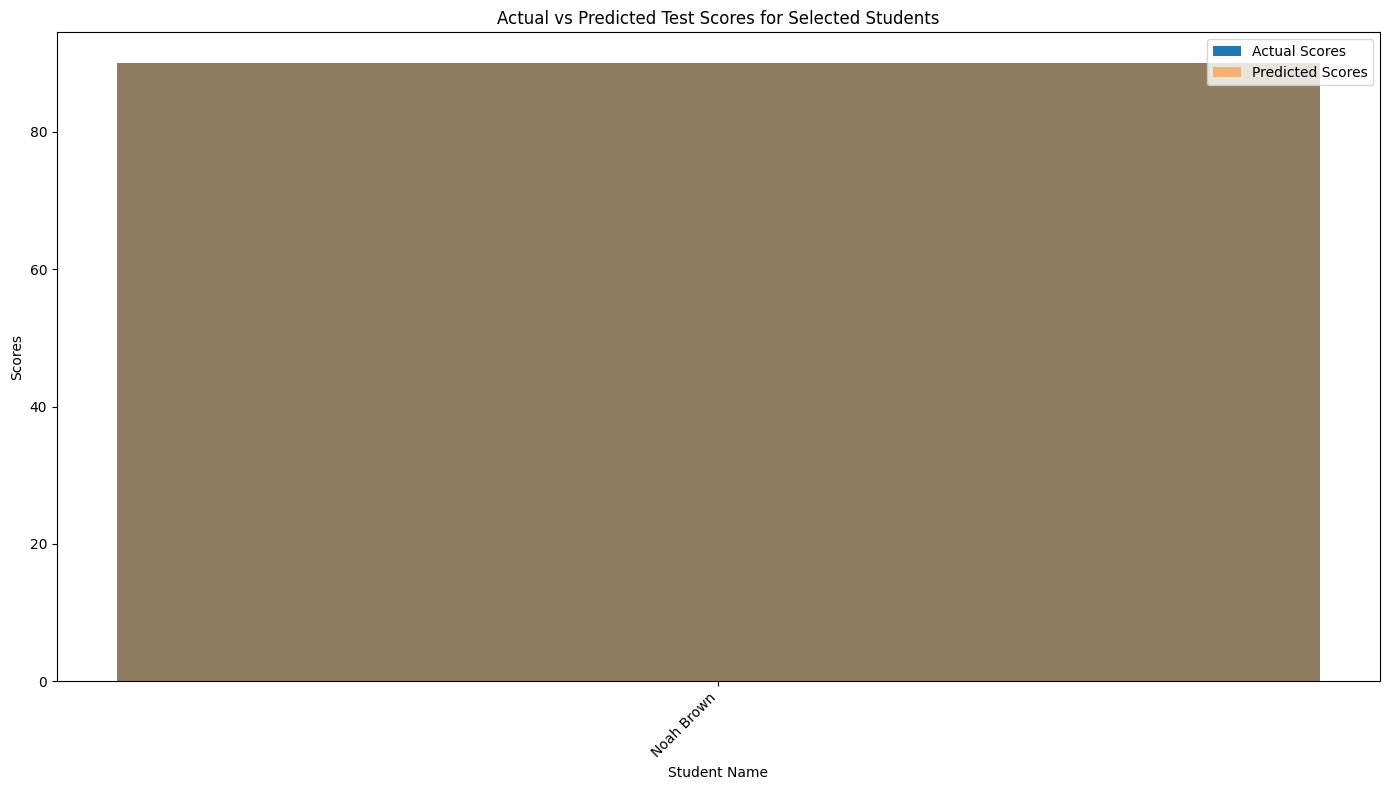


Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit


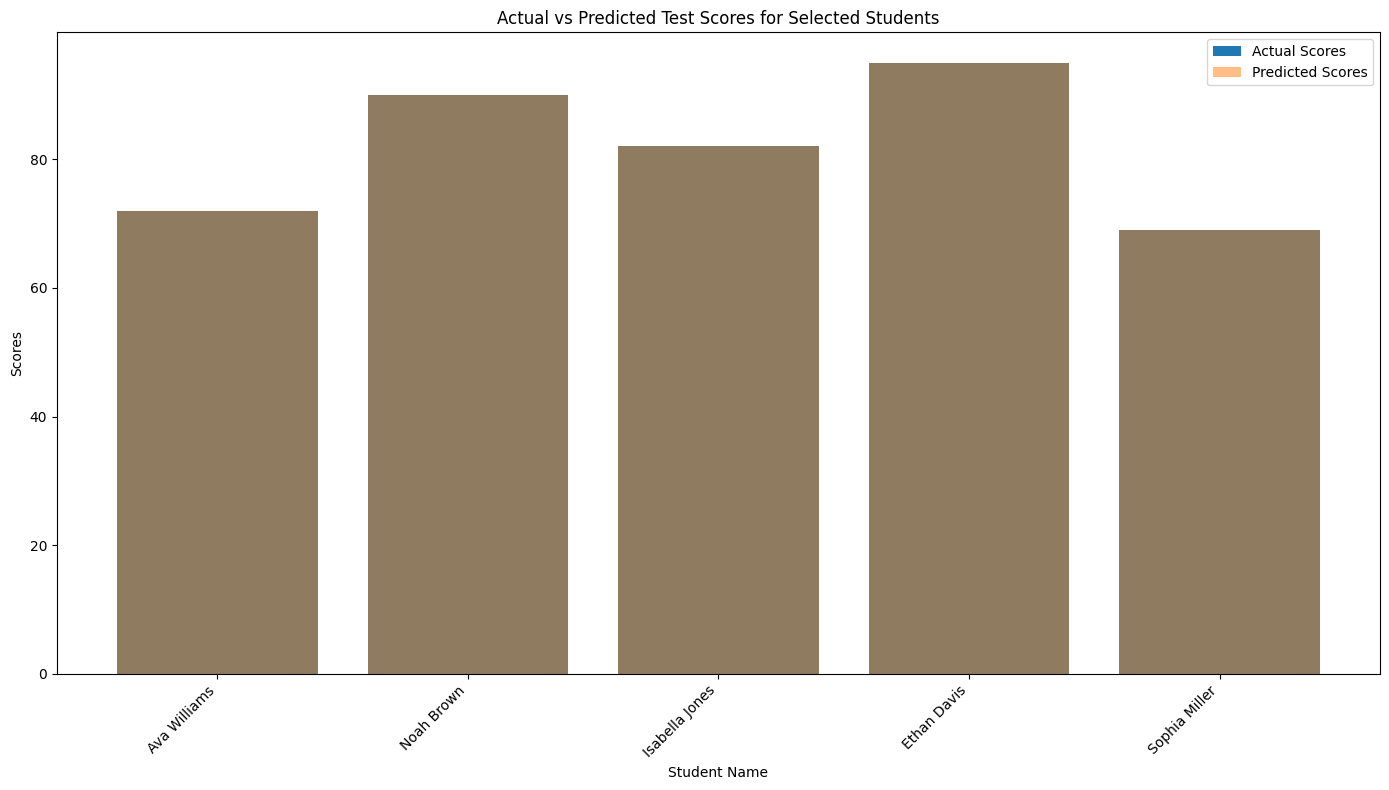


Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit


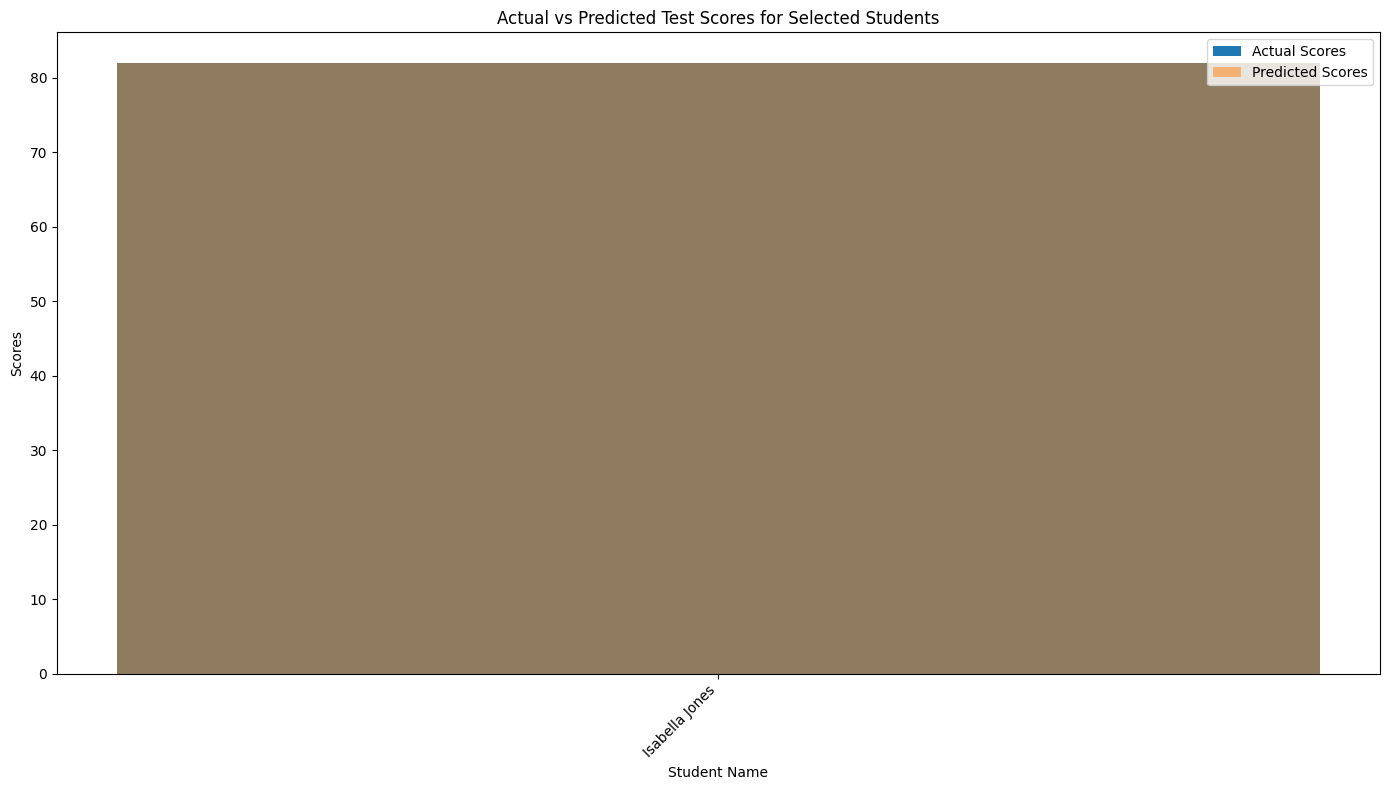


Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit


KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

def predict_scores(selected_students):
    # Preprocess the selected data
    X_selected = selected_students.drop(columns=['Weekend_Test_score'], axis=1)
    y_selected = selected_students['Test_score']
    X_selected = preprocessor.transform(X_selected)

    # Predict scores for selected students
    y_pred_selected = lin_model.predict(X_selected)

    # Plot bar chart for selected students
    plt.figure(figsize=(14, 8))
    student_names_selected = selected_students['Name']
    plt.bar(student_names_selected, y_selected, label='Actual Scores')
    plt.bar(student_names_selected, y_pred_selected, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for Selected Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

def display_dataset():
    print(df)

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Exit")

    option = input("Enter your choice (1, 2, 3, or 4): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        predict_scores(selected_students)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        predict_scores(selected_student)
    elif option == '3':
        display_dataset()
    elif option == '4':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, or 4).")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Train linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

def predict_scores(selected_students):
    # Preprocess the selected data
    X_selected = selected_students.drop(columns=['Weekend_Test_score'], axis=1)
    y_selected = selected_students['Test_score']
    X_selected = preprocessor.transform(X_selected)

    # Predict scores for selected students
    y_pred_selected = lin_model.predict(X_selected)

    # Plot bar chart for selected students
    plt.figure(figsize=(14, 8))
    student_names_selected = selected_students['Name']
    plt.bar(student_names_selected, y_selected, label='Actual Scores')
    plt.bar(student_names_selected, y_pred_selected, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for Selected Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

def display_dataset():
    print(df)

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Exit")

    option = input("Enter your choice (1, 2, 3, or 4): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        predict_scores(selected_students)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        predict_scores(selected_student)
    elif option == '3':
        display_dataset()
    elif option == '4':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, or 4).")



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit
Enter your choice (1, 2, 3, or 4): 4
Exiting...



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit
Enter your choice (1, 2, 3, or 4): 1
Enter the starting ID: 2
Enter the ending ID: 6

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 3


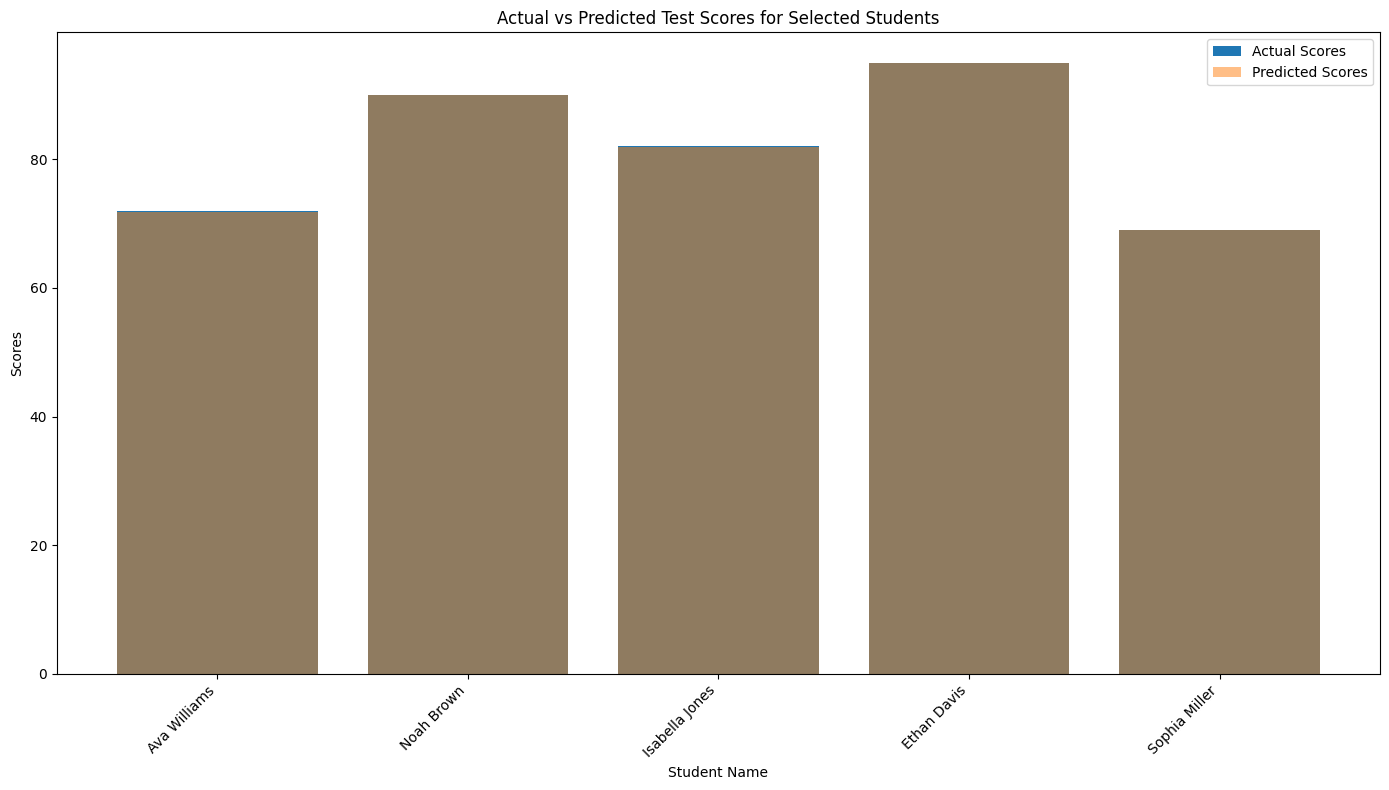


Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit
Enter your choice (1, 2, 3, or 4): 2
Enter the student ID: 2

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 1


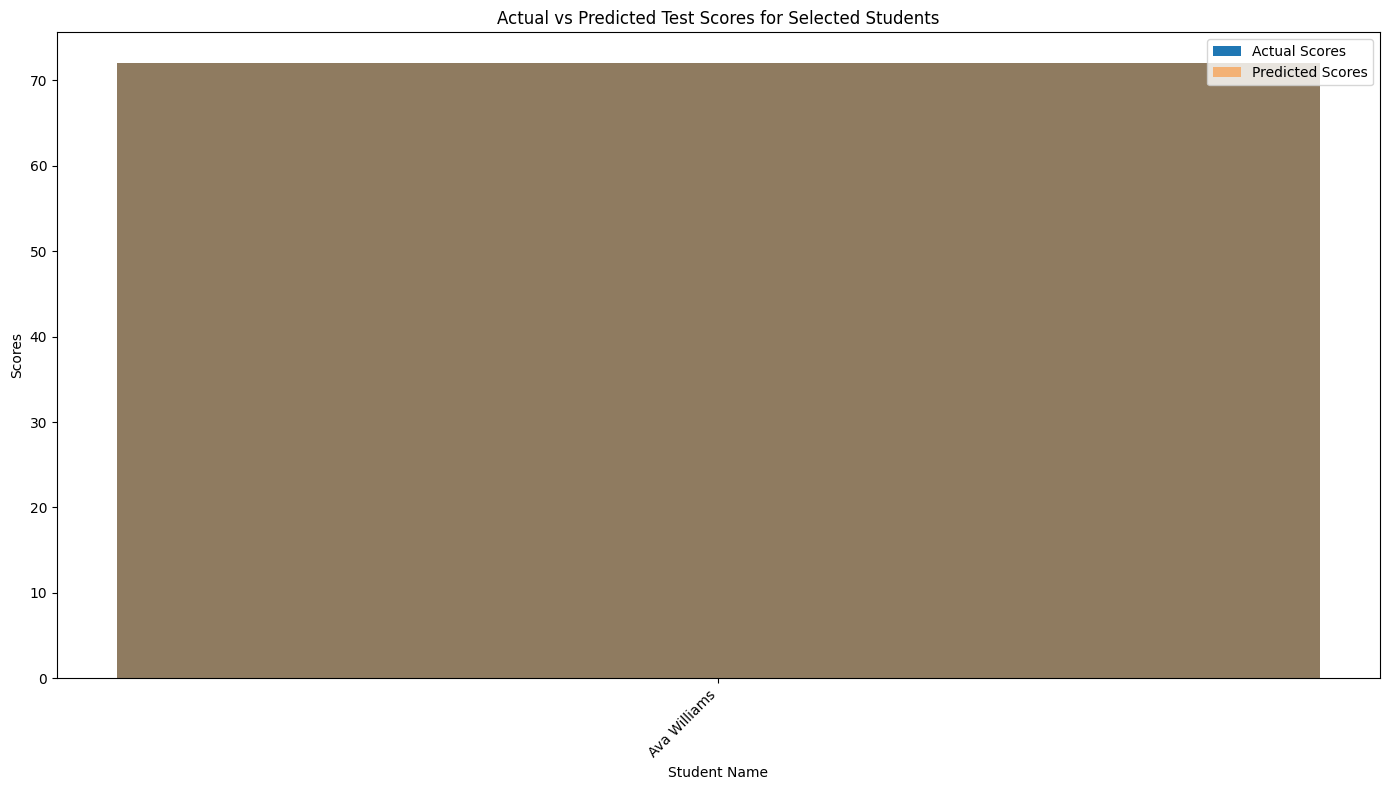


Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit
Enter your choice (1, 2, 3, or 4): 4
Exiting...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def predict_scores(selected_students, model):
    # Preprocess the selected data
    X_selected = selected_students.drop(columns=['Weekend_Test_score'], axis=1)
    y_selected = selected_students['Test_score']
    X_selected = preprocessor.transform(X_selected)

    # Predict scores for selected students
    y_pred_selected = model.predict(X_selected)

    # Plot bar chart for selected students
    plt.figure(figsize=(14, 8))
    student_names_selected = selected_students['Name']
    plt.bar(student_names_selected, y_selected, label='Actual Scores')
    plt.bar(student_names_selected, y_pred_selected, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for Selected Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Exit")

    option = input("Enter your choice (1, 2, 3, or 4): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, or 4).")



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest


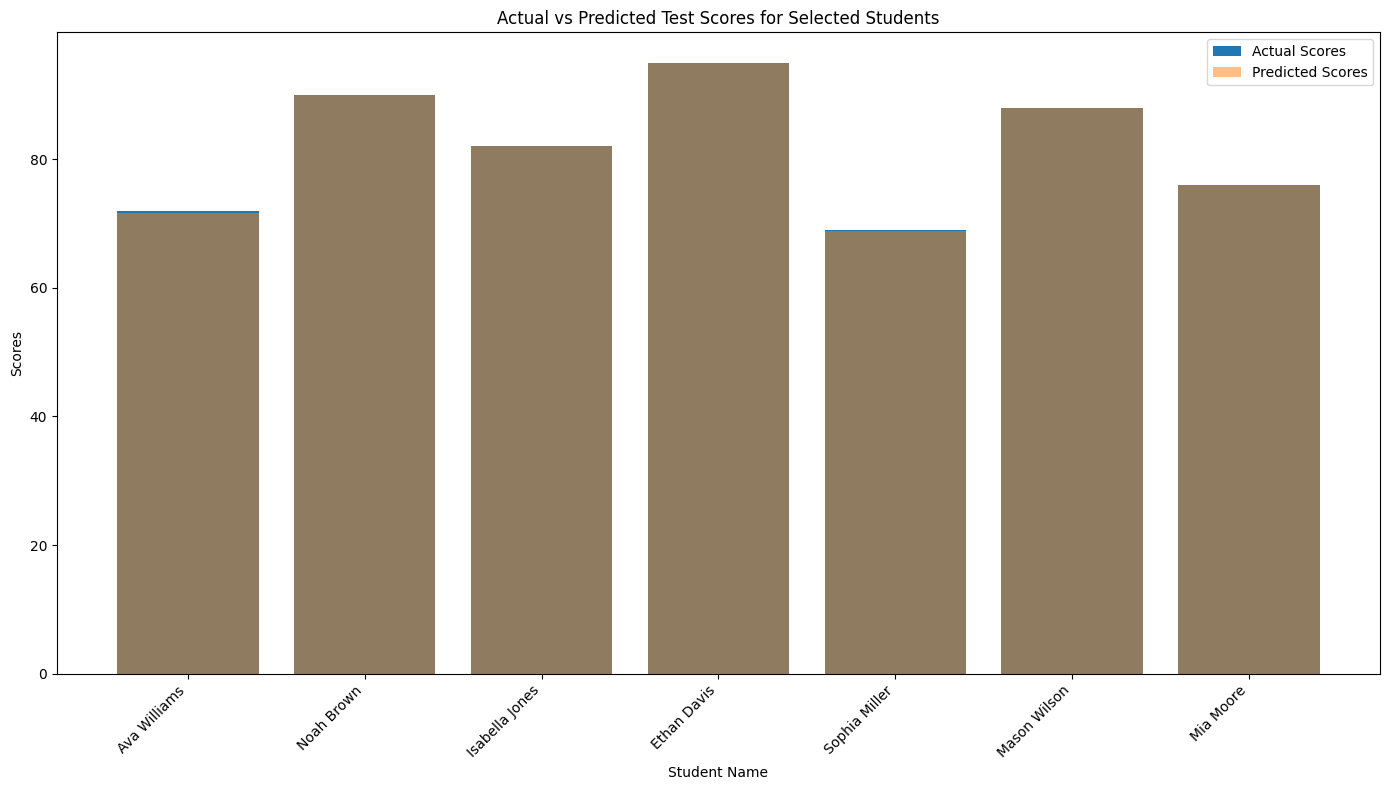

Accuracy (R-squared) for RandomForestRegressor: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


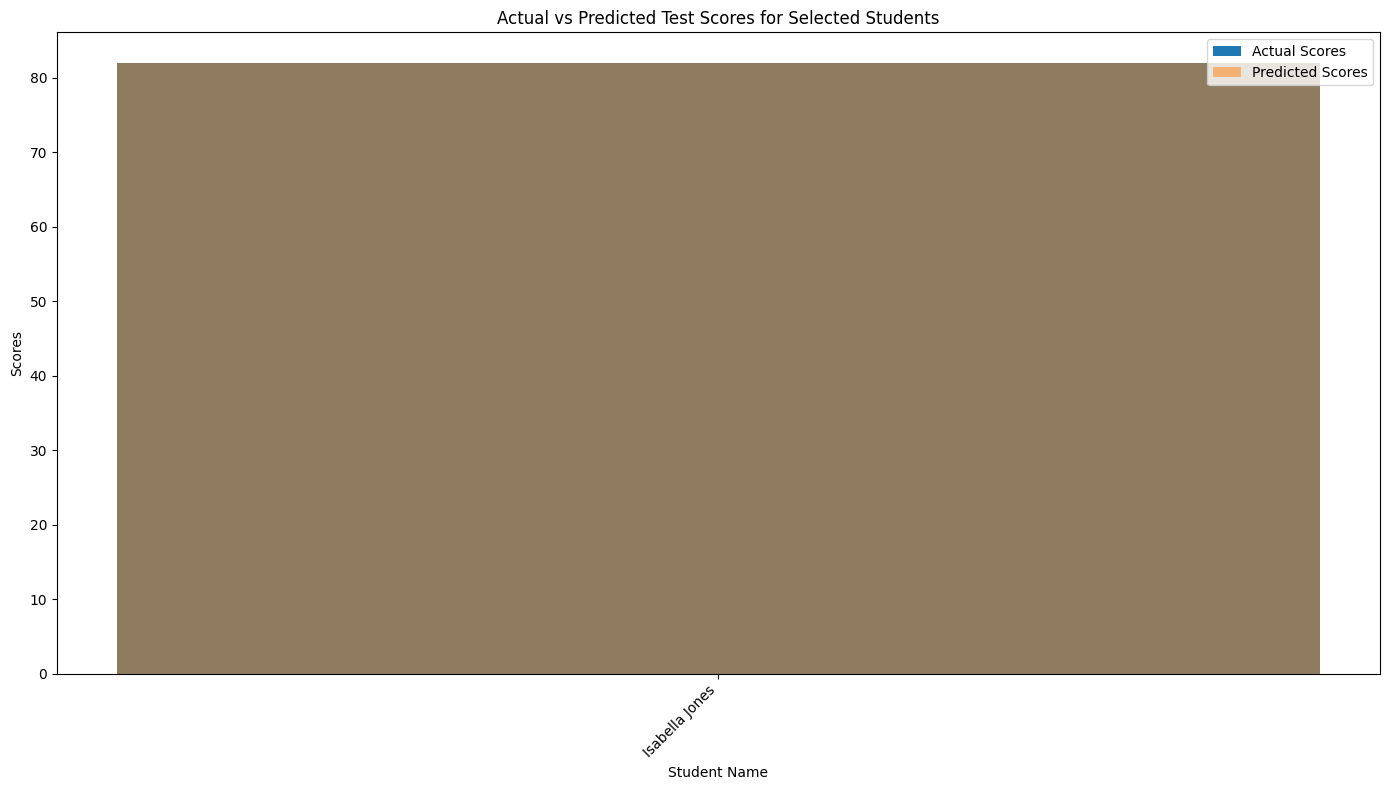

Accuracy (R-squared) for LinearRegression: nan

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Exit
Enter your choice (1, 2, 3, or 4): 4
Exiting...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def predict_scores(selected_students, model):
    # Preprocess the selected data
    X_selected = selected_students.drop(columns=['Weekend_Test_score'], axis=1)
    y_selected = selected_students['Test_score']
    X_selected = preprocessor.transform(X_selected)

    # Predict scores for selected students
    y_pred_selected = model.predict(X_selected)

    # Calculate R-squared
    r_squared = r2_score(y_selected, y_pred_selected)

    # Plot bar chart for selected students
    plt.figure(figsize=(14, 8))
    student_names_selected = selected_students['Name']
    plt.bar(student_names_selected, y_selected, label='Actual Scores')
    plt.bar(student_names_selected, y_pred_selected, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for Selected Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display accuracy percentage
    print(f"Accuracy (R-squared) for {model.__class__.__name__}: {r_squared:.2f}")

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Exit")

    option = input("Enter your choice (1, 2, 3, or 4): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, or 4).")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def predict_scores(data, model):
    # Preprocess the data
    X_data = data.drop(columns=['Weekend_Test_score'], axis=1)
    y_data = data['Test_score']
    X_data = preprocessor.transform(X_data)

    # Predict scores
    y_pred = model.predict(X_data)

    # Calculate R-squared
    r_squared = r2_score(y_data, y_pred)

    # Plot bar chart for all students
    plt.figure(figsize=(14, 8))
    student_names = data['Name']
    plt.bar(student_names, y_data, label='Actual Scores')
    plt.bar(student_names, y_pred, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student Name')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for All Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display accuracy percentage
    print(f"Accuracy (R-squared) for {model.__class__.__name__}: {r_squared:.2f}")

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Display the whole performance prediction")
    print("5. Exit")

    option = input("Enter your choice (1, 2, 3, 4, or 5): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(df, selected_model)
    elif option == '5':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, 4, or 5).")


In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

app = Flask(__name__)

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def predict_scores(data, model):
    # Preprocess the data
    X_data = data.drop(columns=['Weekend_Test_score'], axis=1)
    y_data = data['Test_score']
    X_data = preprocessor.transform(X_data)

    # Predict scores
    y_pred = model.predict(X_data)

    # Calculate R-squared
    r_squared = r2_score(y_data, y_pred)

    return y_pred, r_squared

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    student_ids = request.form.get('student_ids')
    model_name = request.form.get('model_name')

    if model_name not in best_models:
        return render_template('error.html', message='Model not found')

    try:
        student_ids = [int(id.strip()) for id in student_ids.split(',')]
    except ValueError:
        return render_template('error.html', message='Invalid student IDs')

    selected_students = df[df.index.isin(student_ids)]
    selected_model = best_models[model_name]

    y_pred, r_squared = predict_scores(selected_students, selected_model)

    # Store predicted scores in the database (you need to implement this)
    # Here's a simplified example using a dictionary
    predictions = {student_id: score for student_id, score in zip(selected_students.index, y_pred)}

    return render_template('result.html', predictions=predictions, r_squared=r_squared)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def predict_scores(data, model):
    # Preprocess the data
    X_data = data.drop(columns=['Weekend_Test_score'], axis=1)
    y_data = data['Test_score']
    X_data = preprocessor.transform(X_data)

    # Predict scores
    y_pred = model.predict(X_data)

    # Calculate R-squared
    r_squared = r2_score(y_data, y_pred)

    # Plot bar chart for all students
    plt.figure(figsize=(14, 8))
    student_ids = data.index  # Use student IDs as x-axis

    # Assign colors for actual and predicted scores
    actual_color = 'blue'
    predicted_color = 'orange'

    plt.bar(student_ids, y_data, color=actual_color, label='Actual Scores')
    plt.bar(student_ids, y_pred, color=predicted_color, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student ID')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for All Students')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display accuracy percentage
    print(f"Accuracy (R-squared) for {model.__class__.__name__}: {r_squared:.2f}")

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Display the whole performance prediction")
    print("5. Exit")

    option = input("Enter your choice (1, 2, 3, 4, or 5): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(df, selected_model)
    elif option == '5':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, 4, or 5).")



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 1
Enter the starting ID: 2
Enter the ending ID: 6

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 2


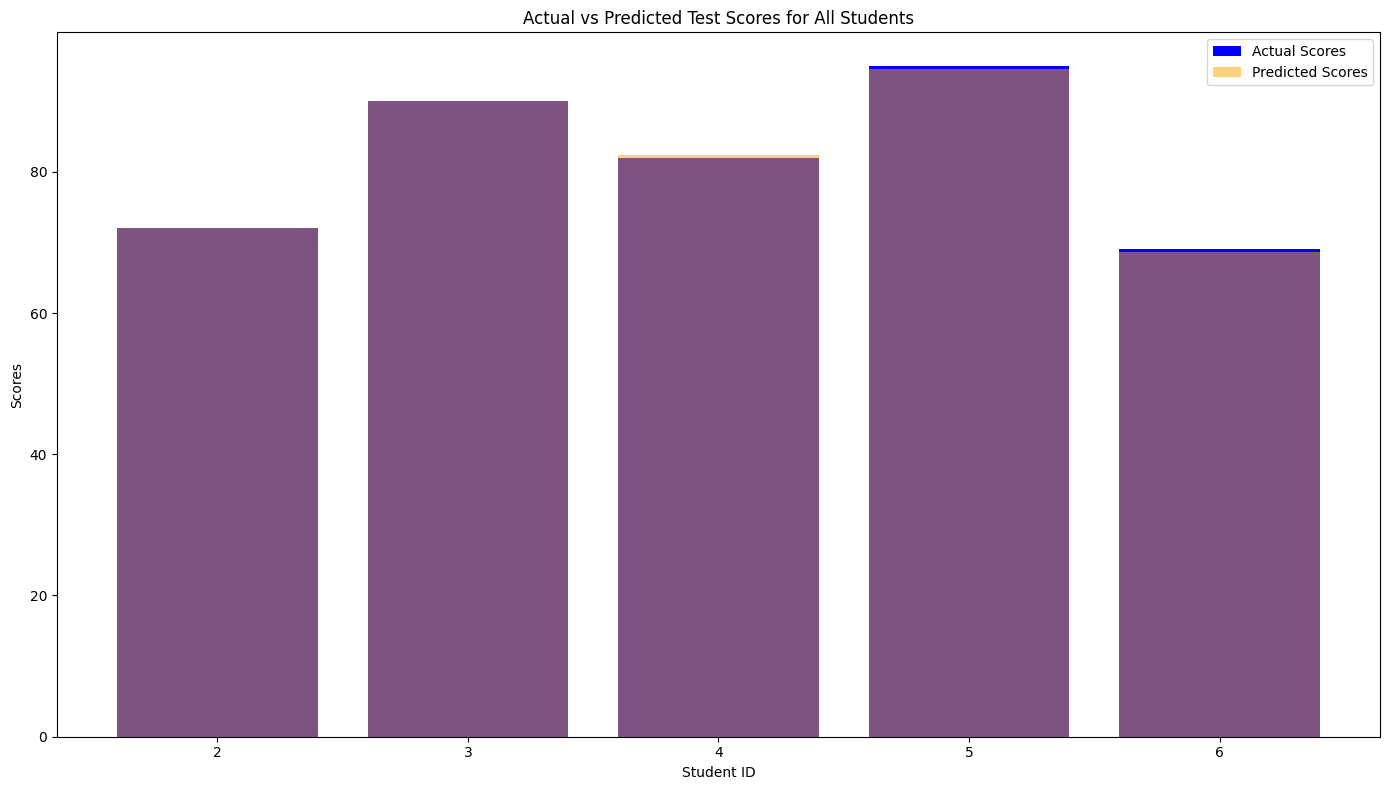

R2 Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 2
Enter the student ID: 2

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


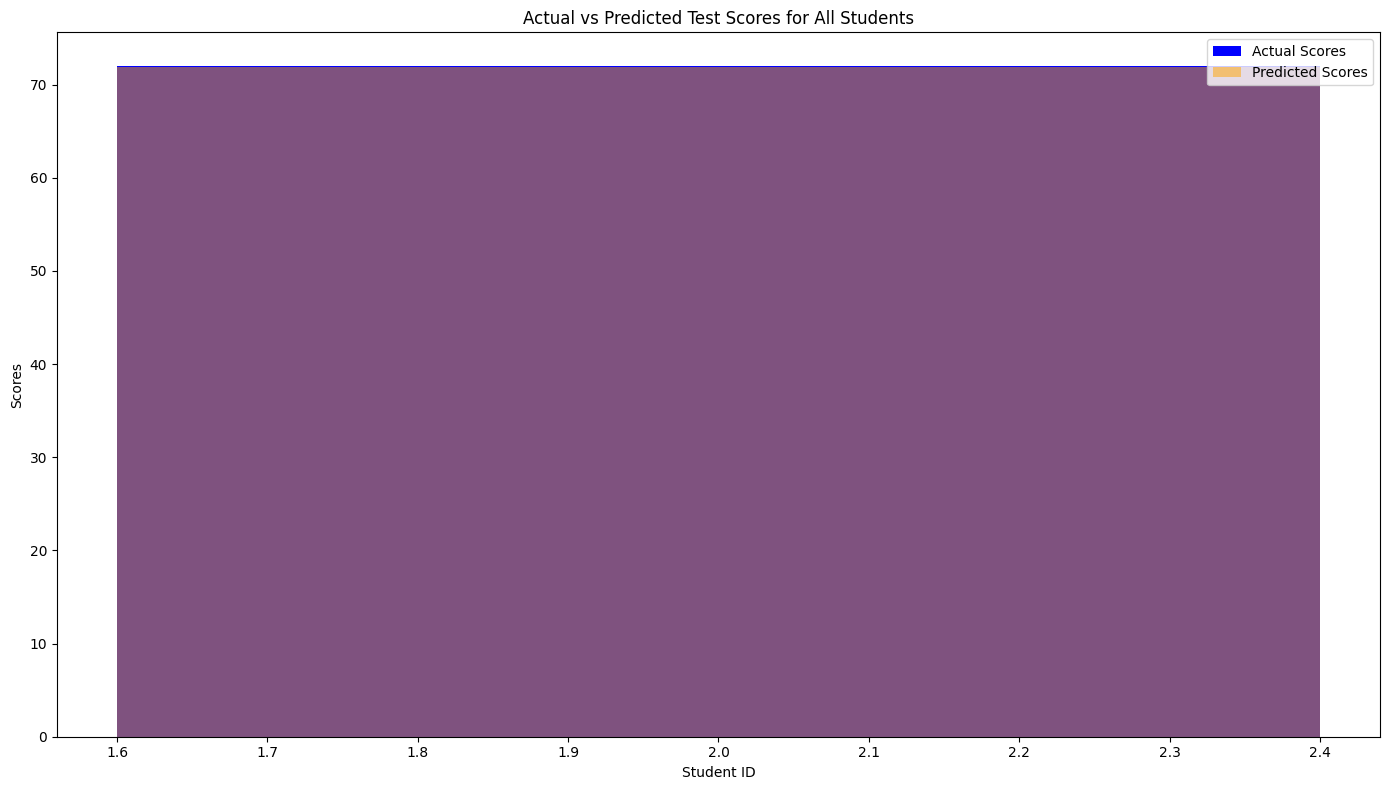

R2 Score: nan
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 1
Enter the starting ID: 2
Enter the ending ID: 6

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 1


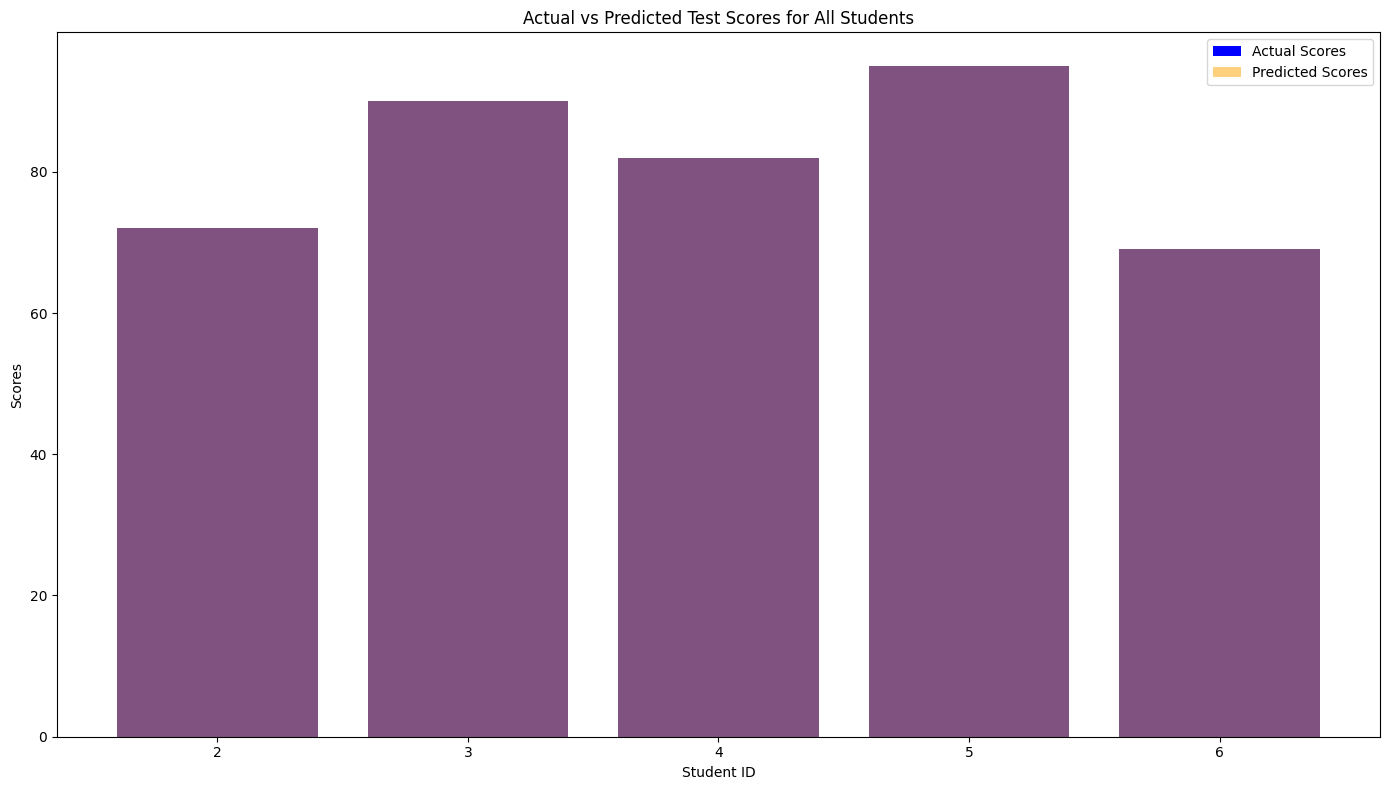

R2 Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 1
Enter the starting ID: 2
Enter the ending ID: 6

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 3


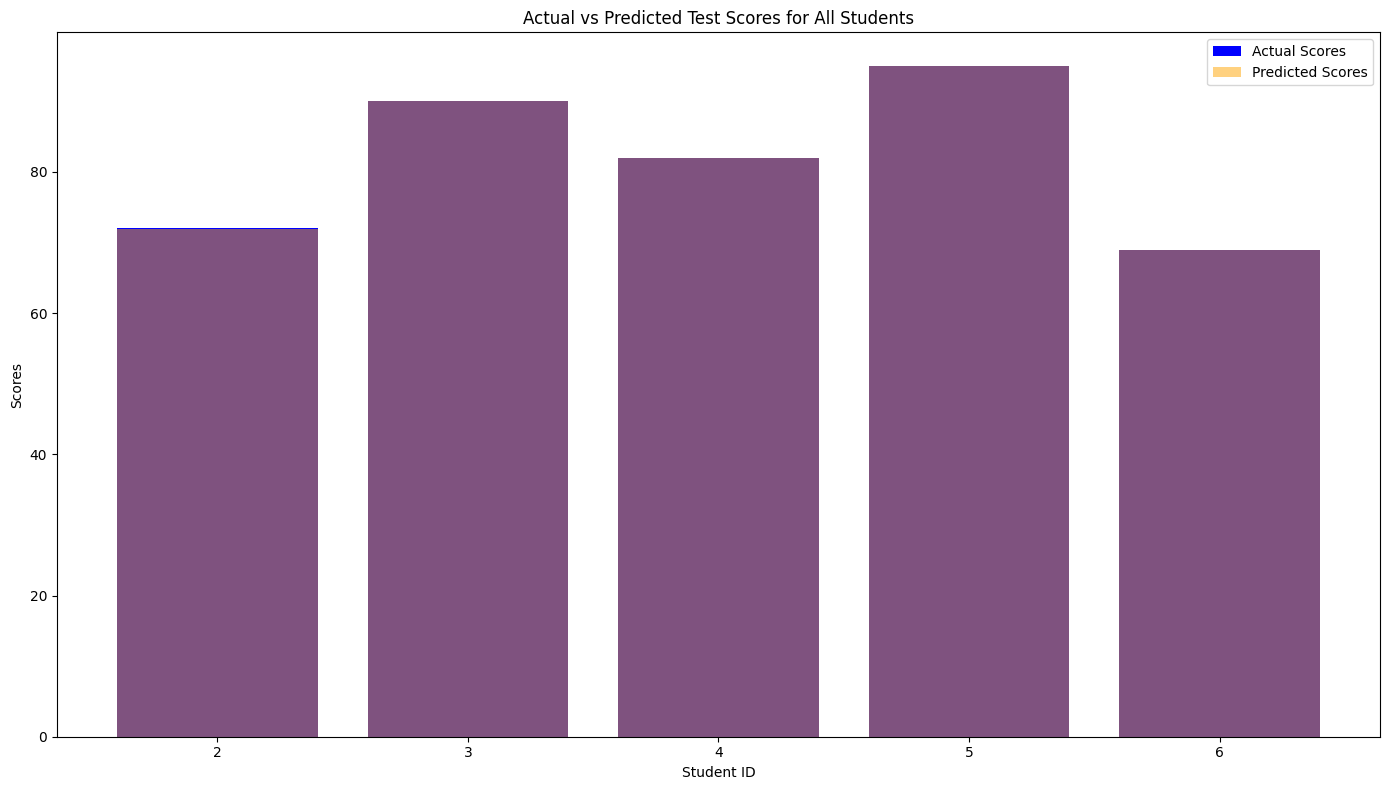

R2 Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 1
Enter the starting ID: 3
Enter the ending ID: 66

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 2


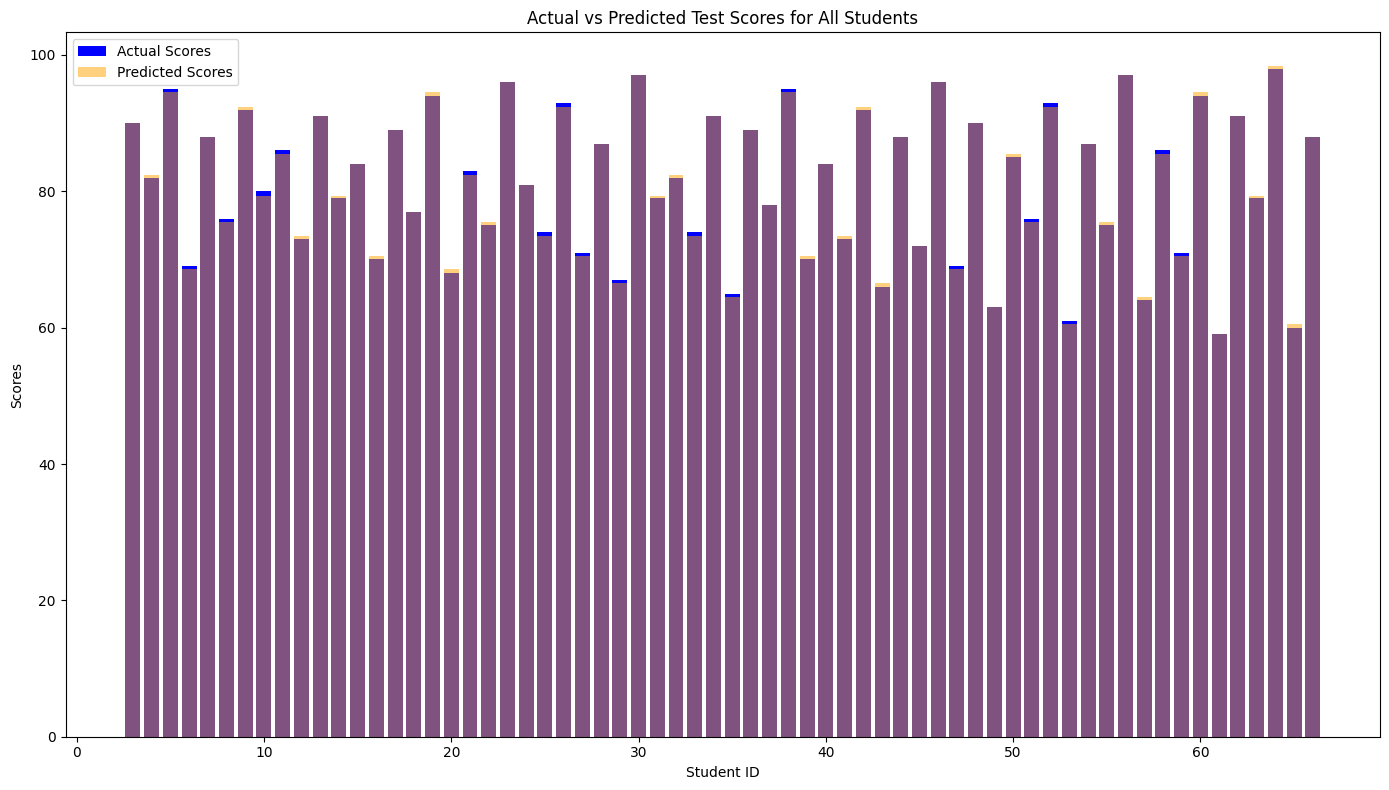

R2 Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 5
Exiting...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv('/content/StudentsPerformanceTS.csv')

# Define features and target variable
X = df.drop(columns=['Weekend_Test_score'], axis=1)
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X, y)
        best_models[name] = model

def calculate_metrics(y_true, y_pred):
    # R2 Score
    r2 = r2_score(y_true, y_pred)

    # Precision, Recall, and F1 Score (Not applicable for regression, added for completeness)
    # Convert continuous scores to binary labels for classification metrics
    y_true_binary = np.where(y_true >= 60, 1, 0)  # Assuming passing score is 60
    y_pred_binary = np.where(y_pred >= 60, 1, 0)

    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)

    return r2, precision, recall, f1

def predict_scores(data, model):
    # Preprocess the data
    X_data = data.drop(columns=['Weekend_Test_score'], axis=1)
    y_data = data['Test_score']
    X_data = preprocessor.transform(X_data)

    # Predict scores
    y_pred = model.predict(X_data)

    # Calculate metrics
    r2, precision, recall, f1 = calculate_metrics(y_data, y_pred)

    # Plot bar chart for all students
    plt.figure(figsize=(14, 8))
    student_ids = data.index  # Use student IDs as x-axis

    # Assign colors for actual and predicted scores
    actual_color = 'blue'
    predicted_color = 'orange'

    plt.bar(student_ids, y_data, color=actual_color, label='Actual Scores')
    plt.bar(student_ids, y_pred, color=predicted_color, alpha=0.5, label='Predicted Scores')
    plt.xlabel('Student ID')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for All Students')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display metrics
    print(f"R2 Score: {r2:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Display the whole performance prediction")
    print("5. Exit")

    option = input("Enter your choice (1, 2, 3, 4, or 5): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(df, selected_model)
    elif option == '5':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, 4, or 5).")
